# 一、导入数据

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras

In [2]:
data = pd.read_excel("input/data_.xlsx",index_col=0)

In [3]:
data_ = data.copy()
data_

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Thickness_classnum,Cell Size _small,Cell Size _medium,Cell Size _big,Thickness_class,Cell Size
ID,,,,,,,,,,,,,,,,
1275807,4,2,4,3,2,2,2,1,1,2,2,1,0,0,medium,small
1193683,1,1,2,1,3,1,1,1,1,2,1,1,0,0,thin,small
1170419,10,10,10,8,2,10,4,1,1,4,3,0,0,1,thick,big
1190386,4,6,6,5,7,6,7,7,3,4,2,0,1,0,medium,medium
1202125,4,1,1,1,2,1,3,1,1,2,2,1,0,0,medium,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493452,1,1,3,1,2,1,1,1,1,2,1,1,0,0,thin,small
1116132,6,3,4,1,5,2,3,9,1,4,2,1,0,0,medium,small
1133136,3,1,1,1,2,3,3,1,1,2,1,1,0,0,thin,small


In [4]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1275807 to 1206314
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              645 non-null    int64 
 1   Uniformity of Cell Size      645 non-null    int64 
 2   Uniformity of Cell Shape     645 non-null    int64 
 3   Marginal Adhesion            645 non-null    int64 
 4   Single Epithelial Cell Size  645 non-null    int64 
 5   Bare Nuclei                  645 non-null    int64 
 6   Bland Chromatin              645 non-null    int64 
 7   Normal Nucleoli              645 non-null    int64 
 8   Mitoses                      645 non-null    int64 
 9   Class                        645 non-null    int64 
 10  Thickness_classnum           645 non-null    int64 
 11  Cell Size _small             645 non-null    int64 
 12  Cell Size _medium            645 non-null    int64 
 13  Cell Size _big           

# 二、设置变量

In [5]:
features = data_.drop(columns=['Class','Thickness_class','Cell Size'])
features

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Thickness_classnum,Cell Size _small,Cell Size _medium,Cell Size _big
ID,,,,,,,,,,,,,
1275807,4,2,4,3,2,2,2,1,1,2,1,0,0
1193683,1,1,2,1,3,1,1,1,1,1,1,0,0
1170419,10,10,10,8,2,10,4,1,1,3,0,0,1
1190386,4,6,6,5,7,6,7,7,3,2,0,1,0
1202125,4,1,1,1,2,1,3,1,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493452,1,1,3,1,2,1,1,1,1,1,1,0,0
1116132,6,3,4,1,5,2,3,9,1,2,1,0,0
1133136,3,1,1,1,2,3,3,1,1,1,1,0,0


In [6]:
target = data_.Class.replace(to_replace = [2, 4], value = [0,1])
target

ID
1275807    0
1193683    0
1170419    1
1190386    1
1202125    0
          ..
493452     0
1116132    1
1133136    0
1158247    0
1206314    0
Name: Class, Length: 645, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
transfer = StandardScaler()

In [9]:
features_ = transfer.fit_transform(features)

In [10]:
features_

array([[-0.17231198, -0.39676889,  0.23516391, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.72153531, -0.43303311, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [ 1.93130744,  2.20136243,  2.23975499, ..., -1.60727513,
        -0.47319015,  3.06646797],
       ...,
       [-0.52291521, -0.72153531, -0.76713162, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.72153531, -0.76713162, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.39676889, -0.0989346 , ...,  0.62217102,
        -0.47319015, -0.32610809]])

# 三、拆分数据集

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_features_full, test_features, train_target_full, test_target = train_test_split(
    features, target, 
    test_size = 145, random_state = 99)

In [13]:
print(train_features_full.shape)
print(train_target_full.shape)
print(test_features.shape)
print(test_target.shape)

(500, 13)
(500,)
(145, 13)
(145,)


In [14]:
train_features, validation_features, train_target, validation_target = train_test_split(
    train_features_full, train_target_full, 
    test_size = 100, random_state = 99)

In [15]:
print(train_features.shape)
print(train_target.shape)
print(validation_features.shape)
print(validation_target.shape)
print(test_features.shape)
print(test_target.shape)

(400, 13)
(400,)
(100, 13)
(100,)
(145, 13)
(145,)


# 四、建立模型

In [16]:
clf = keras.Sequential()
clf.add(keras.layers.InputLayer( input_shape = train_features.shape[1:]))
clf.add(keras.layers.Dense(10,activation='selu'))
clf.add(keras.layers.Dense(5,activation='selu'))
clf.add(keras.layers.Dense(1,activation='sigmoid'))

In [17]:
clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


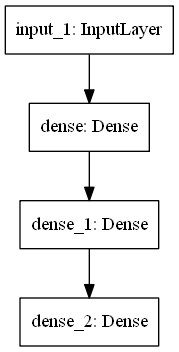

In [18]:
keras.utils.plot_model(clf,to_file='output/nn.png')

# 五、编辑训练模型

In [19]:
clf.compile(loss = 'binary_crossentropy', metrics = 'accuracy', optimizer='rmsprop')

In [20]:
clf.fit(train_features, train_target, batch_size = 20, epochs=200,
         validation_data=(validation_features, validation_target))

Epoch 1/200
20/20 [==============================] - 0s 8ms/step - loss: 0.5450 - accuracy: 0.7250 - val_loss: 0.3947 - val_accuracy: 0.8900
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3986 - accuracy: 0.8900 - val_loss: 0.3302 - val_accuracy: 0.9200
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3365 - accuracy: 0.9125 - val_loss: 0.2718 - val_accuracy: 0.9600
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 0.2877 - accuracy: 0.9175 - val_loss: 0.2319 - val_accuracy: 0.9700
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 0.2489 - accuracy: 0.9275 - val_loss: 0.1976 - val_accuracy: 0.9800
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 0.2193 - accuracy: 0.9325 - val_loss: 0.1750 - val_accuracy: 0.9700
Epoch 7/200
20/20 [==============================] - 0s 3ms/step - loss: 0.1954 - accuracy: 0.9475 - val_loss: 0.1553 - val_accuracy: 0.9700
Epoch 8/200
2

Epoch 57/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0863 - accuracy: 0.9600 - val_loss: 0.1000 - val_accuracy: 0.9600
Epoch 58/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0868 - accuracy: 0.9600 - val_loss: 0.0995 - val_accuracy: 0.9600
Epoch 59/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0855 - accuracy: 0.9625 - val_loss: 0.0999 - val_accuracy: 0.9600
Epoch 60/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0857 - accuracy: 0.9650 - val_loss: 0.0994 - val_accuracy: 0.9600
Epoch 61/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0852 - accuracy: 0.9650 - val_loss: 0.0998 - val_accuracy: 0.9600
Epoch 62/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0852 - accuracy: 0.9675 - val_loss: 0.0998 - val_accuracy: 0.9600
Epoch 63/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0852 - accuracy: 0.9625 - val_loss: 0.0997 - val_accuracy: 0.9600
Epoch 

20/20 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.9675 - val_loss: 0.0993 - val_accuracy: 0.9700
Epoch 115/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0752 - accuracy: 0.9650 - val_loss: 0.0994 - val_accuracy: 0.9700
Epoch 116/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0756 - accuracy: 0.9675 - val_loss: 0.0991 - val_accuracy: 0.9700
Epoch 117/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.9675 - val_loss: 0.0996 - val_accuracy: 0.9700
Epoch 118/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0740 - accuracy: 0.9725 - val_loss: 0.0992 - val_accuracy: 0.9700
Epoch 119/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.9675 - val_loss: 0.0987 - val_accuracy: 0.9700
Epoch 120/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0742 - accuracy: 0.9675 - val_loss: 0.0995 - val_accuracy: 0.9700
Epoch 121/200

20/20 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 0.9700 - val_loss: 0.1026 - val_accuracy: 0.9600
Epoch 172/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0687 - accuracy: 0.9725 - val_loss: 0.1022 - val_accuracy: 0.9600
Epoch 173/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0681 - accuracy: 0.9700 - val_loss: 0.1021 - val_accuracy: 0.9600
Epoch 174/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0682 - accuracy: 0.9750 - val_loss: 0.1023 - val_accuracy: 0.9600
Epoch 175/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0685 - accuracy: 0.9750 - val_loss: 0.1019 - val_accuracy: 0.9600
Epoch 176/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0677 - accuracy: 0.9675 - val_loss: 0.1015 - val_accuracy: 0.9600
Epoch 177/200
20/20 [==============================] - 0s 3ms/step - loss: 0.0672 - accuracy: 0.9725 - val_loss: 0.1020 - val_accuracy: 0.9600
Epoch 178/200

In [21]:
clf.evaluate(test_features, test_target)

5/5 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 0.9793


[0.03930918872356415, 0.9793103337287903]

In [22]:
clf.predict(test_features)

array([[0.00160712],
       [0.9461051 ],
       [0.9605694 ],
       [0.00324212],
       [0.99767596],
       [0.99288577],
       [0.00145309],
       [0.99972314],
       [0.00238768],
       [0.9649115 ],
       [0.99996126],
       [0.00219896],
       [0.9614528 ],
       [0.00175699],
       [0.0018115 ],
       [0.04034983],
       [0.00212457],
       [0.00203342],
       [0.02875291],
       [0.00175699],
       [0.98771954],
       [0.01281479],
       [0.00203342],
       [0.00293854],
       [0.00431373],
       [0.00203342],
       [0.97227556],
       [0.00160712],
       [0.00364079],
       [0.00772193],
       [0.00152685],
       [0.99985063],
       [0.3553815 ],
       [0.00554416],
       [0.00171192],
       [0.00230192],
       [0.00712926],
       [0.00253842],
       [0.01095547],
       [0.01665427],
       [0.00749102],
       [0.00190455],
       [0.00196474],
       [0.00151271],
       [0.9986865 ],
       [0.77150935],
       [0.9995709 ],
       [0.999

In [23]:
clf.predict_classes(test_features)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [24]:
(clf.predict(test_features) > 0.5).astype("int32")

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(test_target,(clf.predict(test_features) > 0.5).astype("int32"))

0.9793103448275862

# 六、callbacks

In [27]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("output/clf.h5", save_best_only=True, monitor='val_loss')
clf.fit(train_features, train_target, batch_size = 20, epochs=500,
         validation_data=(validation_features, validation_target),
         callbacks = checkpoint_cb)

Epoch 1/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0639 - accuracy: 0.9725 - val_loss: 0.1059 - val_accuracy: 0.9600
Epoch 2/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0662 - accuracy: 0.9750 - val_loss: 0.1045 - val_accuracy: 0.9600
Epoch 3/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0636 - accuracy: 0.9750 - val_loss: 0.1049 - val_accuracy: 0.9600
Epoch 4/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0652 - accuracy: 0.9725 - val_loss: 0.1046 - val_accuracy: 0.9600
Epoch 5/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.9700 - val_loss: 0.1051 - val_accuracy: 0.9600
Epoch 6/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0644 - accuracy: 0.9725 - val_loss: 0.1051 - val_accuracy: 0.9600
Epoch 7/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0657 - accuracy: 0.9750 - val_loss: 0.1055 - val_accuracy: 0.9600
Epoch 8/500
2

Epoch 59/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 0.9750 - val_loss: 0.1166 - val_accuracy: 0.9600
Epoch 60/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0600 - accuracy: 0.9750 - val_loss: 0.1168 - val_accuracy: 0.9600
Epoch 61/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0589 - accuracy: 0.9775 - val_loss: 0.1174 - val_accuracy: 0.9600
Epoch 62/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9750 - val_loss: 0.1176 - val_accuracy: 0.9600
Epoch 63/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0605 - accuracy: 0.9750 - val_loss: 0.1175 - val_accuracy: 0.9600
Epoch 64/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0589 - accuracy: 0.9750 - val_loss: 0.1173 - val_accuracy: 0.9600
Epoch 65/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0598 - accuracy: 0.9750 - val_loss: 0.1177 - val_accuracy: 0.9600
Epoch 

20/20 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9750 - val_loss: 0.1310 - val_accuracy: 0.9600
Epoch 117/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 0.9725 - val_loss: 0.1315 - val_accuracy: 0.9600
Epoch 118/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 0.9800 - val_loss: 0.1324 - val_accuracy: 0.9600
Epoch 119/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0552 - accuracy: 0.9775 - val_loss: 0.1330 - val_accuracy: 0.9600
Epoch 120/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0557 - accuracy: 0.9800 - val_loss: 0.1349 - val_accuracy: 0.9500
Epoch 121/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9750 - val_loss: 0.1325 - val_accuracy: 0.9600
Epoch 122/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 0.9775 - val_loss: 0.1334 - val_accuracy: 0.9600
Epoch 123/500

20/20 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9800 - val_loss: 0.1544 - val_accuracy: 0.9500
Epoch 174/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9825 - val_loss: 0.1575 - val_accuracy: 0.9500
Epoch 175/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9775 - val_loss: 0.1568 - val_accuracy: 0.9500
Epoch 176/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9800 - val_loss: 0.1579 - val_accuracy: 0.9500
Epoch 177/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0508 - accuracy: 0.9825 - val_loss: 0.1553 - val_accuracy: 0.9400
Epoch 178/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 0.9800 - val_loss: 0.1576 - val_accuracy: 0.9500
Epoch 179/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0522 - accuracy: 0.9825 - val_loss: 0.1576 - val_accuracy: 0.9500
Epoch 180/500

20/20 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9825 - val_loss: 0.1806 - val_accuracy: 0.9400
Epoch 231/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0485 - accuracy: 0.9850 - val_loss: 0.1761 - val_accuracy: 0.9400
Epoch 232/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0491 - accuracy: 0.9775 - val_loss: 0.1769 - val_accuracy: 0.9400
Epoch 233/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9825 - val_loss: 0.1804 - val_accuracy: 0.9400
Epoch 234/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 0.9775 - val_loss: 0.1771 - val_accuracy: 0.9400
Epoch 235/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 0.9800 - val_loss: 0.1800 - val_accuracy: 0.9400
Epoch 236/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9800 - val_loss: 0.1836 - val_accuracy: 0.9400
Epoch 237/500

20/20 [==============================] - 0s 3ms/step - loss: 0.0466 - accuracy: 0.9850 - val_loss: 0.1960 - val_accuracy: 0.9400
Epoch 288/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0474 - accuracy: 0.9825 - val_loss: 0.1930 - val_accuracy: 0.9400
Epoch 289/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 0.9800 - val_loss: 0.1931 - val_accuracy: 0.9400
Epoch 290/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0456 - accuracy: 0.9850 - val_loss: 0.1949 - val_accuracy: 0.9400
Epoch 291/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0481 - accuracy: 0.9825 - val_loss: 0.1947 - val_accuracy: 0.9400
Epoch 292/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.9825 - val_loss: 0.1947 - val_accuracy: 0.9400
Epoch 293/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0481 - accuracy: 0.9775 - val_loss: 0.1970 - val_accuracy: 0.9400
Epoch 294/500

20/20 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9825 - val_loss: 0.2258 - val_accuracy: 0.9300
Epoch 345/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0448 - accuracy: 0.9875 - val_loss: 0.2145 - val_accuracy: 0.9300
Epoch 346/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0453 - accuracy: 0.9850 - val_loss: 0.2195 - val_accuracy: 0.9300
Epoch 347/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9775 - val_loss: 0.2230 - val_accuracy: 0.9300
Epoch 348/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9875 - val_loss: 0.2150 - val_accuracy: 0.9400
Epoch 349/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0456 - accuracy: 0.9800 - val_loss: 0.2174 - val_accuracy: 0.9300
Epoch 350/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0450 - accuracy: 0.9825 - val_loss: 0.2215 - val_accuracy: 0.9300
Epoch 351/500

20/20 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9850 - val_loss: 0.2439 - val_accuracy: 0.9300
Epoch 402/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 0.9825 - val_loss: 0.2421 - val_accuracy: 0.9300
Epoch 403/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9850 - val_loss: 0.2451 - val_accuracy: 0.9300
Epoch 404/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0438 - accuracy: 0.9825 - val_loss: 0.2515 - val_accuracy: 0.9300
Epoch 405/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9825 - val_loss: 0.2453 - val_accuracy: 0.9300
Epoch 406/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9850 - val_loss: 0.2484 - val_accuracy: 0.9300
Epoch 407/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0429 - accuracy: 0.9800 - val_loss: 0.2478 - val_accuracy: 0.9300
Epoch 408/500

20/20 [==============================] - 0s 2ms/step - loss: 0.0423 - accuracy: 0.9825 - val_loss: 0.2767 - val_accuracy: 0.9200
Epoch 459/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9850 - val_loss: 0.2716 - val_accuracy: 0.9300
Epoch 460/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9850 - val_loss: 0.2743 - val_accuracy: 0.9200
Epoch 461/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0407 - accuracy: 0.9850 - val_loss: 0.2815 - val_accuracy: 0.9200
Epoch 462/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0406 - accuracy: 0.9850 - val_loss: 0.2759 - val_accuracy: 0.9200
Epoch 463/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9850 - val_loss: 0.2793 - val_accuracy: 0.9200
Epoch 464/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0407 - accuracy: 0.9825 - val_loss: 0.2791 - val_accuracy: 0.9200
Epoch 465/500

In [28]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
clf.fit(train_features, train_target, batch_size = 20, epochs=500,
         validation_data=(validation_features, validation_target),
         callbacks = early_stopping_cb)

Epoch 1/500
20/20 [==============================] - 0s 4ms/step - loss: 0.0396 - accuracy: 0.9850 - val_loss: 0.2969 - val_accuracy: 0.9200
Epoch 2/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.9875 - val_loss: 0.2927 - val_accuracy: 0.9200
Epoch 3/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9850 - val_loss: 0.3004 - val_accuracy: 0.9200
Epoch 4/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9900 - val_loss: 0.2956 - val_accuracy: 0.9200
Epoch 5/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9875 - val_loss: 0.2955 - val_accuracy: 0.9200
Epoch 6/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.9850 - val_loss: 0.3053 - val_accuracy: 0.9200
Epoch 7/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9875 - val_loss: 0.3006 - val_accuracy: 0.9200
Epoch 8/500
2

In [29]:
clf.compile(loss = 'binary_crossentropy', metrics = 'accuracy', 
              optimizer=keras.optimizers.RMSprop(learning_rate = 0.0005))

In [30]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
clf.fit(train_features, train_target, batch_size = 20, epochs=500,
         validation_data=(validation_features, validation_target),
         callbacks = [lr_scheduler,checkpoint_cb])

Epoch 1/500
20/20 [==============================] - 0s 7ms/step - loss: 0.0387 - accuracy: 0.9800 - val_loss: 0.2965 - val_accuracy: 0.9200
Epoch 2/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.9850 - val_loss: 0.2969 - val_accuracy: 0.9200
Epoch 3/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9875 - val_loss: 0.2984 - val_accuracy: 0.9200
Epoch 4/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9850 - val_loss: 0.2992 - val_accuracy: 0.9200
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 0.9900 - val_loss: 0.2958 - val_accuracy: 0.9200
Epoch 6/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9875 - val_loss: 0.2975 - val_accuracy: 0.9200
Epoch 7/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0375 - accuracy: 0.9850 - val_loss: 0.3015 - val_accuracy: 0.9200
Epoch 8/500
2

20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 57/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 58/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 59/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 60/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 61/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 62/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 63/500
20/20 

Epoch 114/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 115/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 116/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 117/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 118/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 119/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 120/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200

20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 172/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 173/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 174/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 175/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 176/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 177/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 178/500

20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 229/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 230/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 231/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 232/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 233/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 234/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 235/500

20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 286/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 287/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 288/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 289/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 290/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 291/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 292/500

20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 343/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 344/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 345/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 346/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 347/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 348/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 349/500

20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 400/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 401/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 402/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 403/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 404/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 405/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 406/500

20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 457/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 458/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 459/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 460/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 461/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 462/500
20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.3007 - val_accuracy: 0.9200
Epoch 463/500

In [31]:
clf.save("output/clf_1.h5")

In [32]:
clf = keras.models.load_model("output/clf.h5")